# Game Recomendations on Steam Platform 

Libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler

DataFiles

In [62]:
# Read the data from files
path = '/Users/manju/Desktop/Data'
df_games = pd.read_csv(path+"/games.csv")
df_users = pd.read_csv(path+"/users.csv")
df_recommendations = pd.read_csv(path+"/recommendations.csv")
df_genre = pd.read_json(path+'/games_metadata.json', lines=True)

Overview

In [63]:
df_games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [64]:
'''import pandas as pd

# 1) Ensure your column is a datetime dtype
df_games['date'] = pd.to_datetime(df_games['date_release'])

# method A: by year
df_after2020 = df_games[df_games['date'].dt.year > 2019]'''




"import pandas as pd\n\n# 1) Ensure your column is a datetime dtype\ndf_games['date'] = pd.to_datetime(df_games['date_release'])\n\n# method A: by year\ndf_after2020 = df_games[df_games['date'].dt.year > 2019]"

In [65]:
df_users.head(10)

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
5,5664667,145,5
6,5889167,447,2
7,7281762,1083,1
8,7445952,273,1
9,7462927,51,1


In [66]:
df_recommendations.head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
6,238960,0,0,2017-11-25,True,538.8,88282,6
7,730,0,0,2021-11-30,False,157.5,63209,7
8,255710,0,0,2021-05-21,True,18.7,354512,8
9,289070,0,0,2020-05-26,True,397.5,454422,9


In [67]:
df_genre.head(10)

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
5,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
6,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ..."
7,271850,,"[Strategy, Simulation, Action, RTS, World War II]"
8,282900,"Packed with fast-paced, turn-based RPG action,...","[Anime, JRPG, Female Protagonist, Cute, RPG, S..."
9,19810,Lead a team of domestic counter-terrorism expe...,"[Action, Tactical]"


In [68]:
#Metadata of Dataframes
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB

📄 DataFrame: df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (tot

In [69]:
# Converting all object columns to string dtype
df_games = df_games.astype({col: 'string' for col in df_games.select_dtypes(include='object').columns})
df_genre = df_genre.astype({col: 'string' for col in df_genre.select_dtypes(include='object').columns})

# Converting the date related columns to date dtype
df_games['date_release'] = pd.to_datetime(df_games['date_release'])
df_recommendations['date'] = pd.to_datetime(df_recommendations['date'])

In [70]:
#Metadata of Dataframes after datatype conversions
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  string        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  string        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 3.7 MB

In [71]:
for name, df in df_list:
    print(f"Total No. of records in \n📄 DataFrame: {name}")
    print(df.shape[0])

Total No. of records in 
📄 DataFrame: df_games
50872
Total No. of records in 
📄 DataFrame: df_users
14306064
Total No. of records in 
📄 DataFrame: df_recommendations
41154794
Total No. of records in 
📄 DataFrame: df_genre
50872


In [72]:
#Checking for Null Values
for name, df in df_list:
    print(f"\n📄 DataFrame Null Values: {name}")
    print(df.isna().sum())


📄 DataFrame Null Values: df_games
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

📄 DataFrame Null Values: df_users
user_id     0
products    0
reviews     0
dtype: int64

📄 DataFrame Null Values: df_recommendations
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

📄 DataFrame Null Values: df_genre
app_id         0
description    0
tags           0
dtype: int64


In [73]:
#Checking for 'app_id' Duplicate Values in all dataframes
for name, df in df_list:
    if 'app_id' in df:
        print(f'Total records count in {name} 📄: ',df.shape[0])
        print(f'Distinct app_id records in {name} 📄: ',df['app_id'].nunique())
        
#Checking for 'user_id' Duplicate Values in df_users
print(f'Total records count in df_users 📄: ',df_users.shape[0])
print(f'Distinct user_id records in df_users 📄: ',df_users['user_id'].nunique()) 

#Checking for duplicated based on combination of app_id & their description
print(f'Total duplicate records count in df_games 📄: ',df_games.duplicated(subset=['app_id', 'title']).sum())
print(f'Total duplicate records count in df_genre 📄: ',df_genre.duplicated(subset=['app_id','description']).sum())     
        

Total records count in df_games 📄:  50872
Distinct app_id records in df_games 📄:  50872
Total records count in df_recommendations 📄:  41154794
Distinct app_id records in df_recommendations 📄:  37610
Total records count in df_genre 📄:  50872
Distinct app_id records in df_genre 📄:  50872
Total records count in df_users 📄:  14306064
Distinct user_id records in df_users 📄:  14306064
Total duplicate records count in df_games 📄:  0
Total duplicate records count in df_genre 📄:  0


Data Preprocessing

In [74]:
#Focusing only on the games available on macos
counts = df_games['mac'].value_counts()
print(counts)

mac
False    37854
True     13018
Name: count, dtype: int64


In [75]:
df_games_processed = df_games.copy()
df_games_processed = df_games_processed[df_games_processed['mac'] == True]

In [76]:
df_games_processed

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
13,29180,Osmos,2009-08-18,True,True,True,Very Positive,88,532,9.99,9.99,0.0,True
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,True,True,True,Very Positive,84,294,0.89,2.99,70.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,True,True,True,Mixed,50,22,10.00,0.00,0.0,True
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,True,True,False,Very Positive,90,62,4.00,0.00,0.0,True
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,True,True,True,Mixed,67,80,5.00,0.00,0.0,True
50851,1555150,Pocket Bravery,2023-08-31,True,True,True,Very Positive,89,248,20.00,0.00,0.0,True


In [77]:
#Considering only the past 5 years games
df_games_sub = df_games_processed.copy()
df_games_sub['date'] = pd.to_datetime(df_games_sub['date_release'])
df_games_sub = df_games_sub[df_games_sub['date'].dt.year > 2019]

In [78]:
df_games_sub.drop(columns=['win', 'mac','linux','steam_deck','positive_ratio', 'discount', 'price_original', 'date'], inplace=True)

In [79]:

# Define custom order from worst to best (if reversed)
order = ["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive",
         "Mixed", "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"][::-1]

# Initialize encoder with the custom order
enc = OrdinalEncoder(categories=[order])

# Transform the 'rating' column to ordinal values
df_games_sub[['rating']] = enc.fit_transform(df_games_sub[['rating']])

In [80]:
df_games_sub

,app_id,title,date_release,rating,user_reviews,price_final
32,1872790,Luckitown,2022-01-19,7.0,163,4.99
39,1259750,Tropico 6 - Spitter,2020-04-23,4.0,36,9.99
143,498310,RPG in a Box,2022-05-10,7.0,153,29.99
171,672630,Academia : School Simulator,2021-01-28,7.0,2170,19.99
253,914890,Nine Noir Lives,2022-09-07,6.0,39,19.99
...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00
50851,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00


In [81]:
# Choose the numeric columns to normalize
numeric_cols = ['rating', 'user_reviews', 'price_final']

# Fit scaler and transform
scaler = MinMaxScaler()
df_games_sub[numeric_cols] = scaler.fit_transform(df_games_sub[numeric_cols])

In [82]:
games_processed = pd.merge(df_games_sub, df_genre[['app_id', 'tags']], on='app_id', how='inner')

In [83]:
games_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        4298 non-null   int64         
 1   title         4298 non-null   string        
 2   date_release  4298 non-null   datetime64[ns]
 3   rating        4298 non-null   float64       
 4   user_reviews  4298 non-null   float64       
 5   price_final   4298 non-null   float64       
 6   tags          4298 non-null   string        
dtypes: datetime64[ns](1), float64(3), int64(1), string(2)
memory usage: 235.2 KB


In [84]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,tags
0,1872790,Luckitown,2022-01-19,0.875,0.000567,0.024951,"['Simulation', 'Tower Defense', 'Strategy', 'T..."
1,1259750,Tropico 6 - Spitter,2020-04-23,0.500,0.000096,0.049952,"['Simulation', 'Strategy']"
2,498310,RPG in a Box,2022-05-10,0.875,0.000530,0.149957,"['Game Development', 'Animation & Modeling', '..."
3,672630,Academia : School Simulator,2021-01-28,0.875,0.008005,0.099955,"['Management', 'City Builder', 'Base Building'..."
4,914890,Nine Noir Lives,2022-09-07,0.750,0.000107,0.099955,"['Point & Click', 'Comedy', '2D', 'Noir', 'Cut..."
...,...,...,...,...,...,...,...
4293,2195430,Two Point Campus: Medical School,2023-08-17,0.500,0.000044,0.050003,[]
4294,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000193,0.020001,"['Simulation', 'Indie', 'Casual', 'Survival', ..."
4295,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,0.500,0.000259,0.025001,"['Strategy', 'Indie', 'Simulation']"
4296,1555150,Pocket Bravery,2023-08-31,0.875,0.000882,0.100005,[]


In [85]:
games_processed = (
    games_processed
      .dropna(subset=['tags'])                  # remove NaNs in tags
      [ games_processed['tags'].map(len) > 2 ]  # then remove empty lists
)

In [86]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,tags
0,1872790,Luckitown,2022-01-19,0.875,0.000567,0.024951,"['Simulation', 'Tower Defense', 'Strategy', 'T..."
1,1259750,Tropico 6 - Spitter,2020-04-23,0.500,0.000096,0.049952,"['Simulation', 'Strategy']"
2,498310,RPG in a Box,2022-05-10,0.875,0.000530,0.149957,"['Game Development', 'Animation & Modeling', '..."
3,672630,Academia : School Simulator,2021-01-28,0.875,0.008005,0.099955,"['Management', 'City Builder', 'Base Building'..."
4,914890,Nine Noir Lives,2022-09-07,0.750,0.000107,0.099955,"['Point & Click', 'Comedy', '2D', 'Noir', 'Cut..."
...,...,...,...,...,...,...,...
4288,1410330,Love Shore,2023-06-30,0.500,0.000096,0.074954,"['Cyberpunk', 'RPG', 'Choices Matter', 'Noir',..."
4289,2159650,Drift,2023-05-12,0.500,0.000096,0.079954,"['Open World Survival Craft', 'Survival', 'Onl..."
4291,2349040,Dinky Guardians,2023-10-02,0.750,0.000022,0.065003,"['Automation', 'Simulation', 'Co-op', 'Colony ..."
4294,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000193,0.020001,"['Simulation', 'Indie', 'Casual', 'Survival', ..."


In [87]:
common_game_ids = games_processed['app_id'].unique()
recommendations = df_recommendations[df_recommendations['app_id'].isin(common_game_ids)].copy()

In [88]:
recommendations.count()

app_id            1279263
helpful           1279263
funny             1279263
date              1279263
is_recommended    1279263
hours             1279263
user_id           1279263
review_id         1279263
dtype: int64

In [89]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
73932,1218210,8,0,2022-07-13,True,119.5,4159892,73932
76525,1218210,6,0,2022-04-09,True,24.3,9824132,76525
132577,1218210,14,0,2022-04-01,True,11.7,11311605,132577
254185,1218210,2,0,2022-06-30,True,32.7,3830708,254185
300086,1218210,123,36,2022-04-04,False,32.5,11545696,300086
...,...,...,...,...,...,...,...,...
41154745,1104450,0,0,2020-07-29,True,3.0,9985656,41154745
41154746,893850,0,0,2020-09-14,True,128.0,821144,41154746
41154748,1404850,0,0,2021-04-15,True,8.0,11065427,41154748
41154769,1138660,0,0,2021-08-13,False,11.0,10433531,41154769


In [90]:
#Droping the review_id column & coverting booolean to numeric
recommendations.drop(columns=['review_id'], inplace=True)
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)

In [91]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id
73932,1218210,8,0,2022-07-13,1,119.5,4159892
76525,1218210,6,0,2022-04-09,1,24.3,9824132
132577,1218210,14,0,2022-04-01,1,11.7,11311605
254185,1218210,2,0,2022-06-30,1,32.7,3830708
300086,1218210,123,36,2022-04-04,0,32.5,11545696
...,...,...,...,...,...,...,...
41154745,1104450,0,0,2020-07-29,1,3.0,9985656
41154746,893850,0,0,2020-09-14,1,128.0,821144
41154748,1404850,0,0,2021-04-15,1,8.0,11065427
41154769,1138660,0,0,2021-08-13,0,11.0,10433531


In [92]:
count = (recommendations['hours'] < 2).sum()
count

np.int64(222962)

In [93]:
recommendations_df = recommendations[recommendations['hours'] > 2].copy()

In [94]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id
73932,1218210,8,0,2022-07-13,1,119.5,4159892
76525,1218210,6,0,2022-04-09,1,24.3,9824132
132577,1218210,14,0,2022-04-01,1,11.7,11311605
254185,1218210,2,0,2022-06-30,1,32.7,3830708
300086,1218210,123,36,2022-04-04,0,32.5,11545696
...,...,...,...,...,...,...,...
41154745,1104450,0,0,2020-07-29,1,3.0,9985656
41154746,893850,0,0,2020-09-14,1,128.0,821144
41154748,1404850,0,0,2021-04-15,1,8.0,11065427
41154769,1138660,0,0,2021-08-13,0,11.0,10433531


In [95]:
#Compute max hours_played per user
user_max_hours = recommendations_df.groupby('user_id')['hours'].max().reset_index()
user_max_hours.rename(columns={'hours': 'max_hours'}, inplace=True)

# Merge with original DataFrame
recommendations_df = recommendations_df.merge(user_max_hours, on='user_id')

#Compute implicit rating
recommendations_df['rating'] = recommendations_df['hours'] / recommendations_df['max_hours']

In [96]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,max_hours,rating
0,1218210,8,0,2022-07-13,1,119.5,4159892,119.5,1.000000
1,1218210,6,0,2022-04-09,1,24.3,9824132,32.7,0.743119
2,1218210,14,0,2022-04-01,1,11.7,11311605,33.2,0.352410
3,1218210,2,0,2022-06-30,1,32.7,3830708,32.7,1.000000
4,1218210,123,36,2022-04-04,0,32.5,11545696,35.6,0.912921
...,...,...,...,...,...,...,...,...,...
1034565,1104450,0,0,2020-07-29,1,3.0,9985656,3.0,1.000000
1034566,893850,0,0,2020-09-14,1,128.0,821144,128.0,1.000000
1034567,1404850,0,0,2021-04-15,1,8.0,11065427,8.0,1.000000
1034568,1138660,0,0,2021-08-13,0,11.0,10433531,25.0,0.440000


In [97]:
recommendations_df.drop(columns=['max_hours'], inplace=True)

In [98]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,1218210,8,0,2022-07-13,1,119.5,4159892,1.000000
1,1218210,6,0,2022-04-09,1,24.3,9824132,0.743119
2,1218210,14,0,2022-04-01,1,11.7,11311605,0.352410
3,1218210,2,0,2022-06-30,1,32.7,3830708,1.000000
4,1218210,123,36,2022-04-04,0,32.5,11545696,0.912921
...,...,...,...,...,...,...,...,...
1034565,1104450,0,0,2020-07-29,1,3.0,9985656,1.000000
1034566,893850,0,0,2020-09-14,1,128.0,821144,1.000000
1034567,1404850,0,0,2021-04-15,1,8.0,11065427,1.000000
1034568,1138660,0,0,2021-08-13,0,11.0,10433531,0.440000


In [99]:
# Choose the numeric columns to normalize
numeric_cols = ['helpful', 'funny', 'hours']

# Fit scaler and transform
scaler = MinMaxScaler()
recommendations_df[numeric_cols] = scaler.fit_transform(recommendations_df[numeric_cols])

In [100]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,1218210,0.000410,0.000000,2022-07-13,1,0.117647,4159892,1.000000
1,1218210,0.000307,0.000000,2022-04-09,1,0.022247,9824132,0.743119
2,1218210,0.000717,0.000000,2022-04-01,1,0.009620,11311605,0.352410
3,1218210,0.000102,0.000000,2022-06-30,1,0.030664,3830708,1.000000
4,1218210,0.006297,0.004308,2022-04-04,0,0.030464,11545696,0.912921
...,...,...,...,...,...,...,...,...
1034565,1104450,0.000000,0.000000,2020-07-29,1,0.000902,9985656,1.000000
1034566,893850,0.000000,0.000000,2020-09-14,1,0.126165,821144,1.000000
1034567,1404850,0.000000,0.000000,2021-04-15,1,0.005912,11065427,1.000000
1034568,1138660,0.000000,0.000000,2021-08-13,0,0.008919,10433531,0.440000


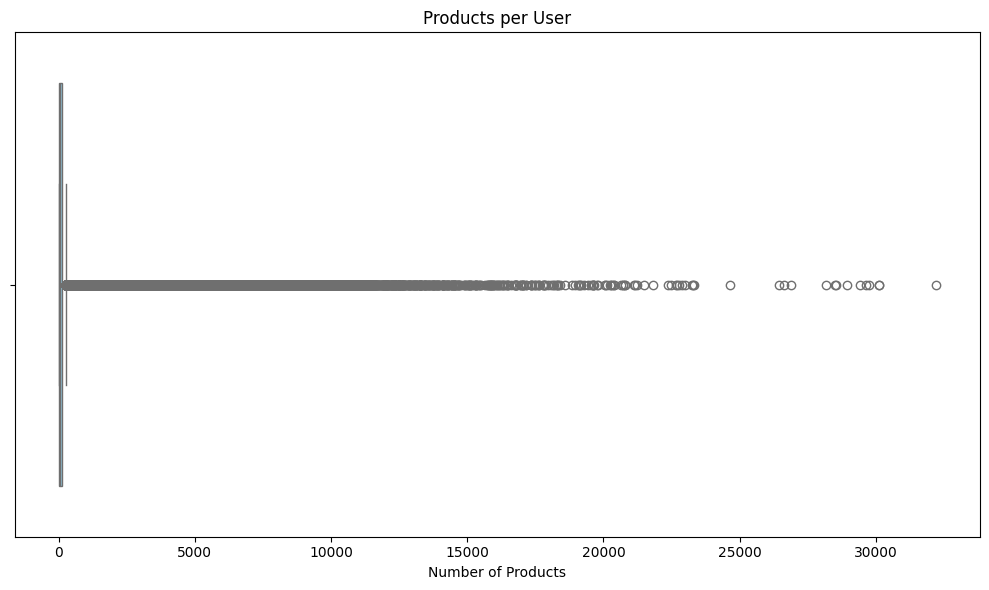

In [101]:
users = df_users.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='products', data=users, color='skyblue')
plt.title('Products per User')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

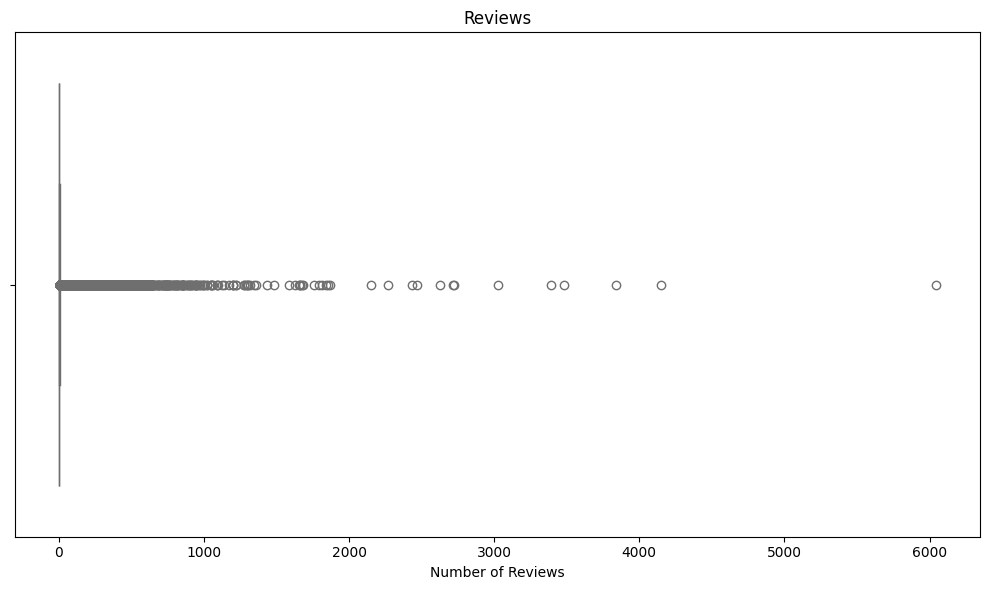

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews', data=users, color='skyblue')
plt.title('Reviews')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [103]:
# Choose the numeric columns to normalize
numeric_cols = ['products', 'reviews']

# Fit scaler and transform
scaler = MinMaxScaler()
df_users[numeric_cols] = scaler.fit_transform(df_users[numeric_cols])

In [104]:
df_users

,user_id,products,reviews
0,7360263,0.011144,0.000000
1,14020781,0.004843,0.000165
2,8762579,0.010213,0.000662
3,4820647,0.005463,0.000662
4,5167327,0.003042,0.000331
...,...,...,...
14306059,5047430,0.000186,0.000000
14306060,5048153,0.000000,0.000000
14306061,5059205,0.000962,0.000000
14306062,5074363,0.000000,0.000000


# Embedded based Recommendations system

In [105]:
recommendations_df.rename(columns={'rating': 'hours_rating'}, inplace=True)


In [106]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,hours_rating
0,1218210,0.000410,0.000000,2022-07-13,1,0.117647,4159892,1.000000
1,1218210,0.000307,0.000000,2022-04-09,1,0.022247,9824132,0.743119
2,1218210,0.000717,0.000000,2022-04-01,1,0.009620,11311605,0.352410
3,1218210,0.000102,0.000000,2022-06-30,1,0.030664,3830708,1.000000
4,1218210,0.006297,0.004308,2022-04-04,0,0.030464,11545696,0.912921
...,...,...,...,...,...,...,...,...
1034565,1104450,0.000000,0.000000,2020-07-29,1,0.000902,9985656,1.000000
1034566,893850,0.000000,0.000000,2020-09-14,1,0.126165,821144,1.000000
1034567,1404850,0.000000,0.000000,2021-04-15,1,0.005912,11065427,1.000000
1034568,1138660,0.000000,0.000000,2021-08-13,0,0.008919,10433531,0.440000


In [107]:
'''#Merge both the dataframes
games_processed_df.set_index('app_id', inplace=True)
recommendations_df = recommendations_df.join(games_processed_df, on='app_id', how='inner')'''


"#Merge both the dataframes\ngames_processed_df.set_index('app_id', inplace=True)\nrecommendations_df = recommendations_df.join(games_processed_df, on='app_id', how='inner')"

In [108]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,hours_rating
0,1218210,0.000410,0.000000,2022-07-13,1,0.117647,4159892,1.000000
1,1218210,0.000307,0.000000,2022-04-09,1,0.022247,9824132,0.743119
2,1218210,0.000717,0.000000,2022-04-01,1,0.009620,11311605,0.352410
3,1218210,0.000102,0.000000,2022-06-30,1,0.030664,3830708,1.000000
4,1218210,0.006297,0.004308,2022-04-04,0,0.030464,11545696,0.912921
...,...,...,...,...,...,...,...,...
1034565,1104450,0.000000,0.000000,2020-07-29,1,0.000902,9985656,1.000000
1034566,893850,0.000000,0.000000,2020-09-14,1,0.126165,821144,1.000000
1034567,1404850,0.000000,0.000000,2021-04-15,1,0.005912,11065427,1.000000
1034568,1138660,0.000000,0.000000,2021-08-13,0,0.008919,10433531,0.440000


In [109]:
from lightfm.data import Dataset

dataset = Dataset()

# 1) Intialize with all users, items, and item-features
dataset.fit(
    users=recommendations_df['user_id'].unique(),
    items=games_processed['app_id'].unique(),
    item_features=set(f for tags in games_processed['tags'] for f in tags)
)

# 2) Build the feature matrix
item_features = dataset.build_item_features(
    (row['app_id'], row['tags'])
    for _, row in games_processed.iterrows()
)


In [112]:
from sklearn.model_selection import train_test_split, KFold

train_df, test_df = train_test_split(
    recommendations_df,
    test_size=0.2,
    random_state=42
)

In [113]:
# Test Data Interactions
test_interactions, _ = dataset.build_interactions(
    (row['user_id'], row['app_id'], row['hours_rating'])
    for _, row in test_df.iterrows()
)

In [ ]:
from lightfm.data import Dataset
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k
import numpy as np

#Cross-validation on the TRAIN set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_precisions, fold_recalls = [], []

for fold, (tr_idx, val_idx) in enumerate(kf.split(train_df), 1):
    tr_df = train_df.iloc[tr_idx]
    val_df = train_df.iloc[val_idx]

    # Build fold-specific interactions
    tr_inter, _  = dataset.build_interactions(
        (u, i, r) for u, i, r in zip(tr_df['user_id'], tr_df['app_id'], tr_df['hours_rating'])
    )
    val_inter, _ = dataset.build_interactions(
        (u, i, r) for u, i, r in zip(val_df['user_id'], val_df['app_id'], val_df['hours_rating'])
    )

    # Initialize & train on this fold
    fm = LightFM(loss='warp', no_components=60, learning_rate=0.05)
    fm.fit(tr_inter, item_features=item_features, epochs=10, num_threads=4)

    # Evaluate on the validation split
    p = precision_at_k(fm, val_inter, item_features=item_features, k=20).mean()
    r = recall_at_k(   fm, val_inter, item_features=item_features, k=20).mean()
    fold_precisions.append(p)
    fold_recalls.append(r)
    print(f"Fold {fold} — Precision@5: {p:.4f}, Recall@5: {r:.4f}")

print(f"\nCV Precision@5: {np.mean(fold_precisions):.4f} ± {np.std(fold_precisions):.4f}")
print(f"CV Recall@5:    {np.mean(fold_recalls):.4f} ± {np.std(fold_recalls):.4f}")


In [118]:
#Train FINAL model on the ENTIRE train set
#    (combine all train_df rows into one interactions matrix)
full_train_interactions, _ = dataset.build_interactions(
    (row['user_id'], row['app_id'], row['hours_rating'])
    for _, row in train_df.iterrows()
)

final_model = LightFM(loss='warp', no_components=30, learning_rate=0.05)
final_model.fit(full_train_interactions, item_features=item_features, epochs=20, num_threads=4)

In [119]:
# 7) Evaluate FINAL model on hold-out TEST set
test_prec = precision_at_k(
    final_model, test_interactions, item_features=item_features, k=20
).mean()
test_rec = recall_at_k(
    final_model, test_interactions, item_features=item_features, k=20
).mean()

print(f"\nFinal Test Precision@5: {test_prec:.4f}")
print(f"Final Test Recall@5:    {test_rec:.4f}")


Final Test Precision@5: 0.0100
Final Test Recall@5:    0.1958
